In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [5]:
df=pd.read_csv("insurance (1).csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
# Numbers of Rows And Columns 
df.shape

(1338, 7)

In [8]:
# getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
# categorical features: Sex,Smoker,Region

In [10]:
#Checking for missing value 
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
# Statistical Measures of the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\Dell\AppData\Local\Temp\ipykernel_11924\4200237792.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["age"])


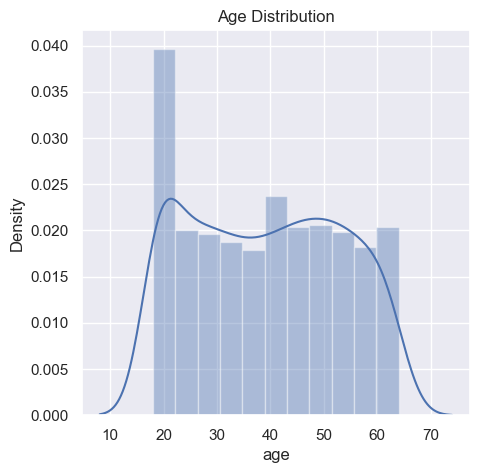

In [12]:
# distribution of age value
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(df["age"])
plt.title("Age Distribution")
plt.show()

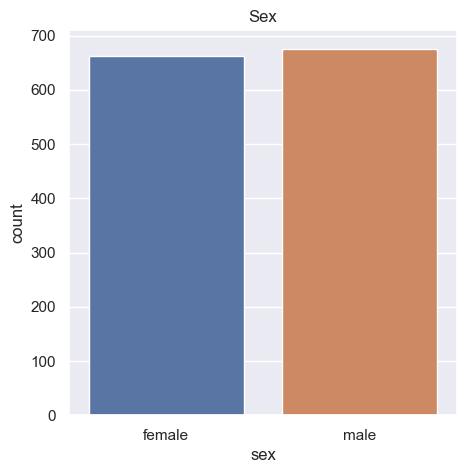

In [20]:
# Gender Column
plt.figure(figsize=(5,5))
sns.countplot(x="sex",data=df)
plt.title("Sex")
plt.show()

In [16]:
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\Dell\AppData\Local\Temp\ipykernel_11924\120965460.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["bmi"])


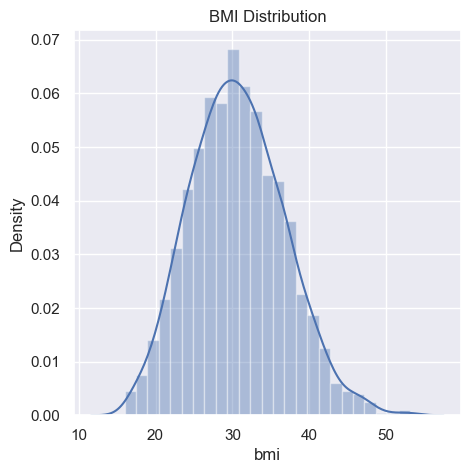

In [17]:
# bmi distribution
plt.figure(figsize=(5,5))
sns.distplot(df["bmi"])
plt.title("BMI Distribution")
plt.show()

In [18]:
# Normal BMI Range 18.5 to 24.9

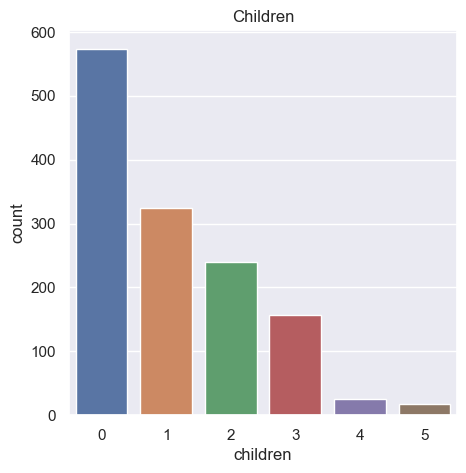

In [19]:
# Children column
plt.figure(figsize=(5,5))
sns.countplot(x="children",data=df)
plt.title("Children")
plt.show()

In [22]:
df["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

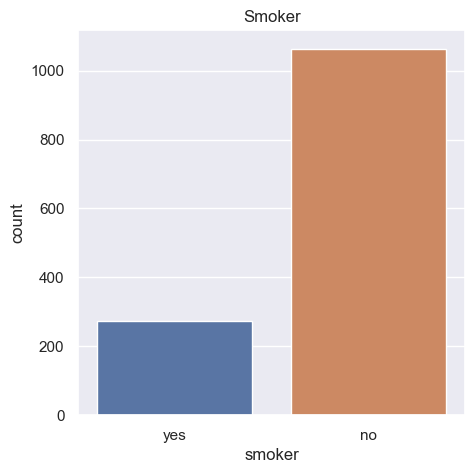

In [23]:
# Smoker column
plt.figure(figsize=(5,5))
sns.countplot(x="smoker",data=df)
plt.title("Smoker")
plt.show()

In [24]:
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

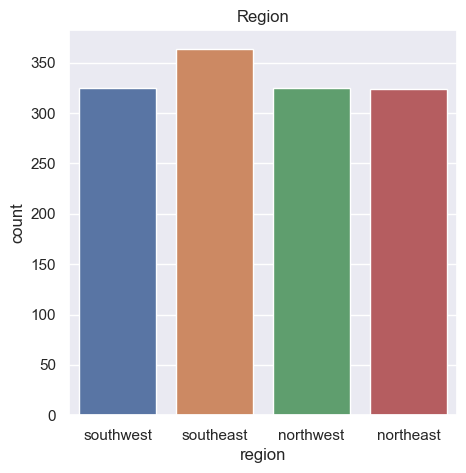

In [25]:
# Region Columns
plt.figure(figsize=(5,5))
sns.countplot(x="region",data=df)
plt.title("Region")
plt.show()

In [26]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Users\Dell\AppData\Local\Temp\ipykernel_11924\2165311491.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["charges"])


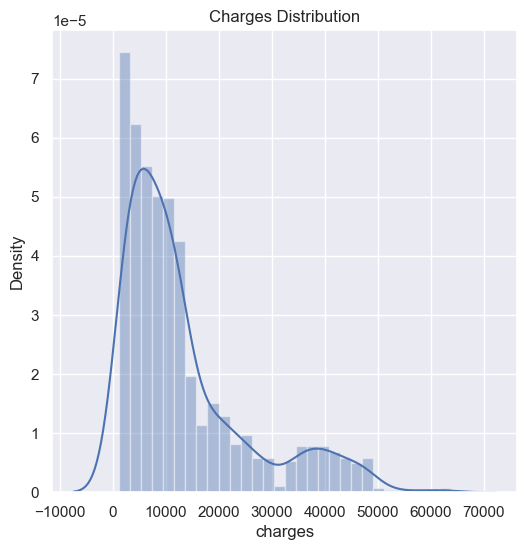

In [28]:
#Distribution of Charges value
plt.figure(figsize=(6,6))
sns.distplot(df["charges"])
plt.title("Charges Distribution")
plt.show()

In [30]:
# Data Pre-processing
#encoding the categorical features

In [35]:
# encoding sex column
df.replace({'sex':{'male':0,'female':1}},inplace=True)
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [32]:
# Spliting the Features and Target

In [36]:
x=df.drop(columns='charges',axis=1)
y=df['charges']

In [37]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [38]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [39]:
# spliting the data into Training and Testing data

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [41]:
# model training 
# Linear Regression

In [43]:
regressor=LinearRegression()

In [44]:
regressor.fit(x_train,y_train)

LinearRegression()

In [45]:
# Prediction on Training data 

In [46]:
training_data = regressor.predict(x_train)

In [50]:
testing_data = regressor.predict(x_test)

In [47]:
# R squared value

In [48]:
r2_train = metrics.r2_score(y_train,training_data)
print("R squared value:",r2_train)

R squared value: 0.751505643411174


In [51]:
r2_test = metrics.r2_score(y_test,testing_data)
print("R squared value:",r2_test)

R squared value: 0.7447273869684077


In [52]:
# Building a Predictive System 

In [54]:
input_data = (31,1,25.74,0,1,0)

# chainging input_data to a numpy array 
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)
print("The Insurance cost is USD",prediction[0])

[3760.0805765]
The Insurance cost is USD 3760.0805764960496


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
